In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df_elo = pd.read_csv("data/metric_data.csv", parse_dates=["date"], index_col=0)
df_elo_adj = pd.read_csv("data/metric_data_adjusted.csv", parse_dates=["date"], index_col=0)
df_ts = pd.read_csv("data/metric_data_trueskill.csv", parse_dates=["date"], index_col=0)

In [30]:
df_elo.head()

,date,organization,division,class,ndcg_score,ndcg_score_random,kt_corr,kt_corr_random,kt_pvalue,kt_pvalue_random,prec_5_score,prec_5_score_random,30dayrollavg_ndcg_score,30dayrollavg_ndcg_score_random,30dayrollavg_kt_corr,30dayrollavg_kt_corr_random,30dayrollavg_kt_pvalue,30dayrollavg_kt_pvalue_random,30dayrollavg_prec_5_score,30dayrollavg_prec_5_score_random
0,2012-02-18,ifbb,fitness,open,0.845706,0.869420,0.121212,-0.060606,0.638361,0.840588,0.4,0.0,0.845706,0.869420,0.121212,-0.060606,0.638361,0.840588,0.40,0.000000
1,2012-03-02,ifbb,fitness,open,0.928906,0.813861,0.450000,0.016667,0.015155,0.964695,0.8,0.4,0.887306,0.841641,0.285606,-0.021970,0.326758,0.902642,0.60,0.200000
2,2012-03-16,ifbb,fitness,open,0.851980,0.819069,0.277778,-0.055556,0.358488,0.919455,0.6,0.6,0.875531,0.834117,0.282997,-0.033165,0.337335,0.908246,0.60,0.333333
3,2012-05-05,ifbb,fitness,open,0.909430,0.903420,0.333333,-0.055556,0.259518,0.919455,0.6,0.6,0.884006,0.851443,0.295581,-0.038763,0.317881,0.911049,0.60,0.400000
4,2012-06-01,ifbb,fitness,open,0.872646,0.951721,0.272727,0.418182,0.282967,0.086561,0.8,0.6,0.881734,0.871498,0.291010,0.052626,0.310898,0.746151,0.64,0.440000


In [51]:
df_elo_merge = pd.merge(df_elo, df_elo_adj, how="inner", on=['date', 'organization', 'division', 'class'],
                      suffixes=["_elo", "_elo_adj"])
df_metric_temp = pd.merge(df_elo_merge, df_ts, how="inner", on=['date', 'organization', 'division', 'class'],
                      suffixes=["", "_ts"])

In [52]:
df_metric_temp.columns

Index(['date', 'organization', 'division', 'class', 'ndcg_score_elo',
       'ndcg_score_random_elo', 'kt_corr_elo', 'kt_corr_random_elo',
       'kt_pvalue_elo', 'kt_pvalue_random_elo', 'prec_5_score_elo',
       'prec_5_score_random_elo', '30dayrollavg_ndcg_score_elo',
       '30dayrollavg_ndcg_score_random_elo', '30dayrollavg_kt_corr_elo',
       '30dayrollavg_kt_corr_random_elo', '30dayrollavg_kt_pvalue_elo',
       '30dayrollavg_kt_pvalue_random_elo', '30dayrollavg_prec_5_score_elo',
       '30dayrollavg_prec_5_score_random_elo', 'ndcg_score_elo_adj',
       'ndcg_score_random_elo_adj', 'kt_corr_elo_adj',
       'kt_corr_random_elo_adj', 'kt_pvalue_elo_adj',
       'kt_pvalue_random_elo_adj', 'prec_5_score_elo_adj',
       'prec_5_score_random_elo_adj', '30dayrollavg_ndcg_score_elo_adj',
       '30dayrollavg_ndcg_score_random_elo_adj',
       '30dayrollavg_kt_corr_elo_adj', '30dayrollavg_kt_corr_random_elo_adj',
       '30dayrollavg_kt_pvalue_elo_adj',
       '30dayrollavg_kt_pval

In [63]:
df_melt = (
    df_metric_temp.melt(
        id_vars=[
            "date",
            "organization",
            "division",
            "class",
            "30dayrollavg_prec_5_score_elo",
            "30dayrollavg_prec_5_score_elo_adj",
            "30dayrollavg_prec_5_score",
            "30dayrollavg_prec_5_score_random_elo",
        ],
        value_vars=[
            "30dayrollavg_kt_corr_elo",
            "30dayrollavg_kt_corr_elo_adj",
            "30dayrollavg_kt_corr",
            "30dayrollavg_kt_corr_random_elo",
        ],
        var_name="metric",
        value_name="30day_rolling_avg_kt_corr",
    )
    .melt(
        id_vars=[
            "date",
            "organization",
            "division",
            "class",
            "metric",
            "30day_rolling_avg_kt_corr",
        ],
        value_vars=[
            "30dayrollavg_prec_5_score_elo",
            "30dayrollavg_prec_5_score_elo_adj",
            "30dayrollavg_prec_5_score",
            "30dayrollavg_prec_5_score_random_elo",
        ],
        var_name="metric2",
        value_name="30day_rolling_avg_prec_5_score",
    )
)

In [68]:
df_replace = df_melt.replace({
    "30dayrollavg_kt_corr_elo": "elo",
    "30dayrollavg_kt_corr_elo_adj": "adjusted elo",
    "30dayrollavg_kt_corr": "trueskill",
    "30dayrollavg_kt_corr_random_elo": "random",
    "30dayrollavg_prec_5_score_elo": "elo",
    "30dayrollavg_prec_5_score_elo_adj": "adjusted elo",
    "30dayrollavg_prec_5_score": "trueskill",
    "30dayrollavg_prec_5_score_random_elo": "random"
})

df_metric = df_replace[df_replace["metric"] == df_replace["metric2"]].drop(["metric2"], axis=1)

In [69]:
df_metric.head()

,date,organization,division,class,metric,30day_rolling_avg_kt_corr,30day_rolling_avg_prec_5_score
0,2012-02-18,ifbb,fitness,open,elo,0.121212,0.40
1,2012-03-02,ifbb,fitness,open,elo,0.285606,0.60
2,2012-03-16,ifbb,fitness,open,elo,0.282997,0.60
3,2012-05-05,ifbb,fitness,open,elo,0.295581,0.60
4,2012-06-01,ifbb,fitness,open,elo,0.291010,0.64


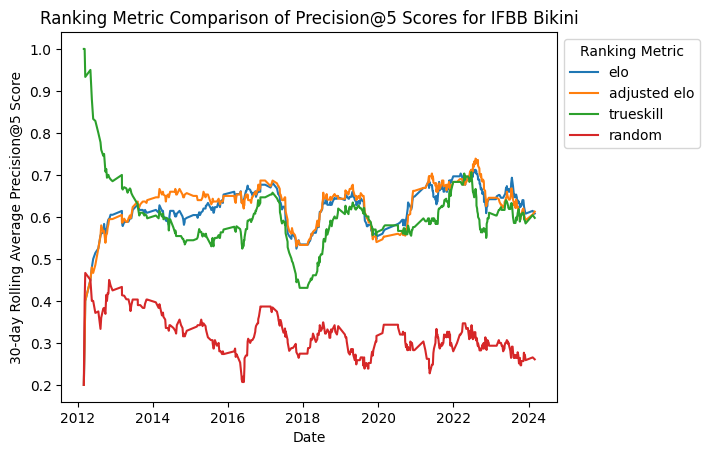

In [78]:
ax = sns.lineplot(
    data=df_metric[
        (df_metric["organization"] == "ifbb")
        & (df_metric["division"] == "bikini")
        & (df_metric["class"] == "open")
    ],
    x="date",
    y="30day_rolling_avg_prec_5_score",
    hue="metric"
)
plt.xlabel("Date")
plt.ylabel("30-day Rolling Average Precision@5 Score")
plt.title("Ranking Metric Comparison of Precision@5 Scores for IFBB Bikini")
plt.legend(title="Ranking Metric")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Text(0.5, 1.0, 'Ranking Metric Comparison of Kendall Tau Correlation Coefficient of IFBB Bikini')

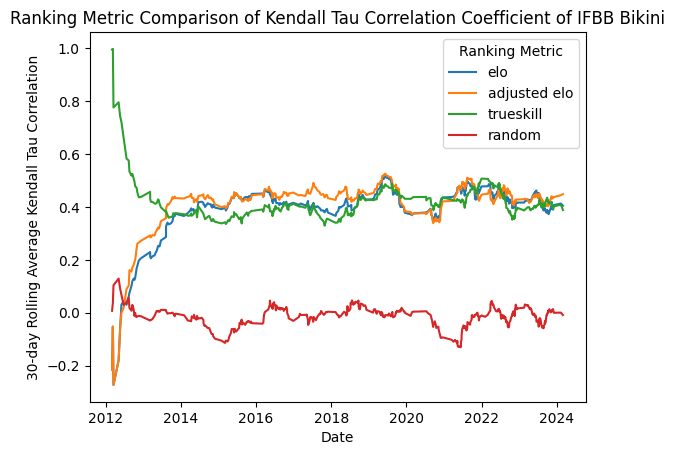

In [79]:
ax = sns.lineplot(
    data=df_metric[
        (df_metric["organization"] == "ifbb")
        & (df_metric["division"] == "bikini")
        & (df_metric["class"] == "open")
    ],
    x="date",
    y="30day_rolling_avg_kt_corr",
    hue="metric"
)
plt.xlabel("Date")
plt.ylabel("30-day Rolling Average Kendall Tau Correlation")
plt.legend(title="Ranking Metric")
plt.title("Ranking Metric Comparison of Kendall Tau Correlation Coefficient of IFBB Bikini")